# Transcript Analysis

In [19]:
%load_ext autoreload
%autoreload 2
import os
import re
import sys
import tqdm
import pickle
import datetime
import pandas as pd
import seaborn as sns
from utils import fuzzy_lookup
import matplotlib.pyplot as plt
from collections import defaultdict
# Add dimag path to the system path
sys.path.append('C:/Users/rahim/Documents/GitHub/dimag') # PC
sys.path.append('/Users/rahimhashim/Desktop/News/dimag') # Mac
import press_releases
# Add other functions
from utils.transcript_search import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# print all the different authors
print_all_authors()

All Podcasts:
                                            a16z Bio: 29   transcripts
                             Democracy Now Headlines: 207  transcripts
                                      Empire Podcast: 29   transcripts
                             The Chris Hedges Report: 25   transcripts
                                    Bill Simmons NFL: 121  transcripts
                                     Foreign Affairs: 1    transcripts
                                 The Ezra Klein Show: 158  transcripts
                              Owen Jones - Palestine: 268  transcripts
                        Theo Von - This Past Weekend: 63   transcripts
               Chomskys Philosophy - Best of Chomsky: 150  transcripts
                                         Lex Fridman: 450  transcripts
                             Conversation with Tyler: 144  transcripts
                             The Wall Street Journal: 31   transcripts
                                         BBC Archive: 1    tran

***
## Example 1: News Middle Eastern Coverage

We can look across multiple podcasts and news coverages to search for a specific topic.

In [4]:
author_names = [
	'Democracy Now',
	'Democracy Now Headlines', 
	'The Chris Hedges Report', 
	'The Ezra Klein Show', 
	'Theo Von'
	'Lex Fridman',
	'Joe Rogan', 
	'The Tucker Carlson Show'
]
transcript_df = main(author_names)

Searching for Democracy Now transcripts...
All Podcasts:
                                            a16z Bio: 29   transcripts
                             Democracy Now Headlines: 207  transcripts
                                      Empire Podcast: 29   transcripts
                             The Chris Hedges Report: 25   transcripts
                                    Bill Simmons NFL: 121  transcripts
                                     Foreign Affairs: 1    transcripts
                                 The Ezra Klein Show: 158  transcripts
                              Owen Jones - Palestine: 268  transcripts
                        Theo Von - This Past Weekend: 63   transcripts
               Chomskys Philosophy - Best of Chomsky: 150  transcripts
                                         Lex Fridman: 450  transcripts
                             Conversation with Tyler: 144  transcripts
                             The Wall Street Journal: 31   transcripts
                    

In [5]:
# reverse the order of the x-axis
# show all columns
pd.set_option('display.max_columns', None)
transcript_df = transcript_df.sort_values(
	by='video_views', 
	ascending=False, 
	ignore_index=True
)
transcript_df

,video_description,podcast,date,year,month,day,weekday,url,transcript,date_generated,transcription_model,length,video_keywords,video_views,video_rating,title
0,Donald Trump is currently the 2024 Presidentia...,Joe Rogan,2024-10-25,2024,10,25,Friday,https://www.youtube.com/watch?v=hBMoPUAeLnY,"[The Joe Rogan Experience., Trained by day, Jo...","December 03, 2024",whisper medium 20231117,10730s,"['Joe Rogan Experience', 'JRE', 'Joe', 'Rogan'...",52484021,None,Joe Rogan Experience #2219 - Donald Trump
1,"Tim Dillon is a standup comedian, actor, and h...",Joe Rogan,2020-10-27,2020,10,27,Tuesday,https://www.youtube.com/watch?v=jdVso9FSkmE,"[Joe Rogan Podcast, checking out the Joe Rogan...","December 07, 2024",whisper medium 20231117,11469s,"['Joe Rogan Experience', 'JRE', 'Joe', 'Rogan'...",28149663,None,Joe Rogan Experience #1555 - Alex Jones & Tim ...
2,Katt Williams is a stand-up comic and actor. H...,Joe Rogan,2024-02-29,2024,02,29,Thursday,https://www.youtube.com/watch?v=1zb2SuW-jug,"[The Joe Rogan Experience, Train by day, Joe R...","December 06, 2024",whisper medium 20231117,11127s,"['Joe Rogan Experience', 'JRE', 'Joe', 'Rogan'...",23945610,None,Joe Rogan Experience #2111 - Katt Williams
3,"Donnell Rawlings is a stand up comedian, actor...",Joe Rogan,2020-11-19,2020,11,19,Thursday,https://www.youtube.com/watch?v=C7t_LxpzYTg,"[Joe Rogan Podcast, check it out!, The Joe Rog...","December 06, 2024",whisper medium 20231117,12272s,"['Joe Rogan Experience', 'JRE', 'Joe', 'Rogan'...",20368930,None,Joe Rogan Experience #1567 - Donnell Rawlings ...
4,"Kanye West is a rapper, record producer, fashi...",Joe Rogan,2020-10-24,2020,10,24,Saturday,https://www.youtube.com/watch?v=qxOeWuAHOiw,"[The Joe Rogan Experience., Trained by day, Jo...","December 07, 2024",whisper medium 20231117,10649s,"['Joe Rogan Experience', 'JRE', 'Joe', 'Rogan'...",20257249,None,Joe Rogan Experience #1554 - Kanye West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,On Tuesday I got back from an eight-day trip t...,The Ezra Klein Show,2024-06-14,2024,06,14,Friday,https://www.youtube.com/watch?v=0Qn1u4Ik5bc,"[From New York Times opinion, this is the Ezra...","June 14, 2024",whisper medium 20231117,3310s,[],369,None,The View From the Israeli Right
864,NaN,The Ezra Klein Show,2024-05-24,2024,05,24,Friday,https://www.youtube.com/watch?v=4MJ2D9uCLLA,"[From New York Times opinion, this is the Ezra...","May 24, 2024",whisper medium 20231117,3116s,[],346,None,"‘Artificial Intelligence?’ No, Collective Inte..."
865,NaN,The Ezra Klein Show,2024-05-21,2024,05,21,Tuesday,https://www.youtube.com/watch?v=RogFZO_HvQ4,"[From New York Times opinion, this is the Ezra...","May 21, 2024",whisper medium 20231117,3664s,[],325,None,A Conservative Futurist and a Supply-Side Libe...
866,NaN,The Chris Hedges Report,2024-12-11,2024,12,11,Wednesday,https://www.youtube.com/watch?v=QBV5HFeLCA8,[There are numerous layers of trauma arising f...,"December 16, 2024",whisper medium 20231117,3263s,[],8,None,Enduring the Trauma of Genocide (w Gabor Maté)...


#### Direct Search

In [22]:
import warnings
warnings.filterwarnings('ignore')

topic = 'israel'
transcript_df_sep = transcript_df.explode('transcript', ignore_index=True)
transcript_df_sep['position'] = transcript_df_sep.groupby('title').cumcount()

# initialize topic_df
topic_df = pd.DataFrame()

for podcast in transcript_df_sep['podcast'].unique():
	print(f'Podcast: {podcast}')
	podcast_topic_df = press_releases.count_topic_mentions(
		transcript_df_sep[transcript_df_sep['podcast'] == podcast], 
		topic, 
		search_field='transcript', 
		verbose=True
	)
	topic_df = pd.concat([topic_df, podcast_topic_df], ignore_index=True)

Podcast: Joe Rogan
Number of Dates: 128/370 (34.59%)
  First Date : 2019-10-09
  Recent Date: 2024-12-26
  Dates with Topic:
    2024-12-26: 1
    2024-12-18: 1
    2024-12-11: 1
    2024-12-05: 2
    2024-12-04: 2
    2024-11-26: 6
    2024-11-20: 2
    2024-11-15: 1
    2024-11-12: 1
    2024-11-08: 1
    2024-11-07: 14
    2024-11-05: 9
    2024-11-04: 2
    2024-11-02: 4
    2024-10-30: 24
    2024-10-25: 5
    2024-10-24: 1
    2024-10-17: 1
    2024-10-16: 5
    2024-10-09: 2
    2024-10-03: 10
    2024-10-02: 19
    2024-09-26: 1
    2024-09-25: 1
    2024-09-18: 1
    2024-09-16: 1
    2024-09-04: 1
    2024-09-03: 1
    2024-08-29: 13
    2024-08-28: 1
    2024-08-27: 2
    2024-08-22: 1
    2024-08-21: 14
    2024-08-16: 4
    2024-08-15: 3
    2024-08-08: 4
    2024-08-07: 1
    2024-08-01: 3
    2024-07-31: 1
    2024-07-30: 1
    2024-07-25: 4
    2024-07-19: 1
    2024-07-02: 2
    2024-06-19: 1
    2024-06-13: 1
    2024-06-12: 1
    2024-06-11: 11
    2024-06-05: 2
    

In [17]:
# sort by topic_url_count, url, and date
topic_date_df = topic_df.drop_duplicates(subset=['url']).sort_values(
	by=[f'{topic}_url_count', 'url', 'date'], 
	ascending=False).reset_index()[['podcast', 'date', 'url', f'{topic}_url_count', 'title', 'video_views']]
topic_date_df

,podcast,date,url,israel_url_count,title,video_views
0,The Ezra Klein Show,2024-10-08,https://www.youtube.com/watch?v=z7lQ8f09LPc,196,How Biden’s Middle East Policy Fell Apart,28509
1,The Ezra Klein Show,2023-10-31,https://www.youtube.com/watch?v=M7K327quaEc,170,"If Not This, Then What Should Israel Do?",47481
2,The Ezra Klein Show,2024-06-14,https://www.youtube.com/watch?v=0Qn1u4Ik5bc,169,The View From the Israeli Right,369
3,The Ezra Klein Show,2023-11-10,https://www.youtube.com/watch?v=EVeh-26rCdQ,157,What Israelis Fear the World Does Not Understand,61475
4,The Ezra Klein Show,2024-05-07,https://www.youtube.com/watch?v=pNPmdSY_Z2c,150,Watching the Protests From Israel,14316
...,...,...,...,...,...,...
862,The Ezra Klein Show,2024-03-22,https://www.youtube.com/watch?v=-ZwsvYfzm8Q,0,The Deep Conflict Between Our Work and Parenti...,5469
863,The Ezra Klein Show,2023-04-07,https://www.youtube.com/watch?v=-Ut3h5st6VM,0,Why A.I. Might Not Take Your Job or Supercharg...,2689
864,Joe Rogan,2020-01-17,https://www.youtube.com/watch?v=-KQGZa773sI,0,Joe Rogan Experience #1413 - Bill Maher,9144158
865,Joe Rogan,2024-10-15,https://www.youtube.com/watch?v=-FYv4yjOi2Q,0,Joe Rogan Experience #2213 - Diane K. Boyd,742216


In [16]:
# print all urls where the topic is mentioned
topic_df['text'] = topic_df['transcript']
press_releases.print_topic_segments(
	topic_df, 
	topic, 
	max_print=10, 
	most_recent_dates=5
)

Printing segments mentioning 'israel'...
  Number of Dates: 306

Bernard Hudson New Orleans Attack, Cybertruck Explosion, CIA Corruption, & Tulsi Gabbard
  2025-01-03: (https://www.youtube.com/watch?v=61rCf7INomY)
  Mentions: 1
  411  |                               : She's not like anti-Israel or she's, you know, she's within the mainstream on most things. [[00:28:19](https://www.youtube.com/watch?v=61rCf7INomY&t=1699.7s)]
  412  |                               : But the resistance to her is very, very intense. [[00:28:26](https://www.youtube.com/watch?v=61rCf7INomY&t=1706.8200000000002s)]
  413  |                               : Where do you think that comes from? [[00:28:29](https://www.youtube.com/watch?v=61rCf7INomY&t=1709.28s)]
  414  |                               : I think some of it seems to come from a sense that she is not deferential to the foreign [[00:28:31](https://www.youtube.com/watch?v=61rCf7INomY&t=1711.08s)]
  415  |                               : policy consensus

#### Fuzzy Search

In [ ]:

def check_for_fuzzy_columns(transcript_df, target_word_list):
	filtered_target_word_list = []
	exclusion_list = []
	for word in target_word_list:
		if f'max_fuzzy_{word}' in transcript_df.columns:
			exclusion_list.append(word)
			# remove the word from the target_word_list
		else:
			filtered_target_word_list.append(word)
	print(f'Excluding the following words already in the dataset: ')
	print(f'  {exclusion_list}')
	return filtered_target_word_list

def topic_search(transcript_df, target_word_list, fuzzy_threshold=0.85):
	print('Performing fuzzy search for the following words:')
	print(f'  {target_word_list}')
	# check to see if the target words are already in the transcript_df
	target_word_list_filtered = check_for_fuzzy_columns(transcript_df, target_word_list)
	max_fuzzy_list = defaultdict(list)
	max_fuzzy_word_list = defaultdict(list)

	for idx, transcript in enumerate(transcript_df['transcript']):
		podcast_channel = transcript_df.iloc[idx]['podcast']
		pod_title = transcript_df.iloc[idx]['title']	
		pod_date = transcript_df.iloc[idx]['year'] + '-' + transcript_df.iloc[idx]['month'] + '-' + transcript_df.iloc[idx]['day']
		print(f'{podcast_channel} - {pod_date}: {pod_title}')
		for t_index, target_word in enumerate(target_word_list_filtered):
			max_fuzzy, max_fuzzy_word = fuzzy_lookup.fuzzy_matching(target_word, transcript, fuzzy_threshold)
			max_fuzzy_list[target_word].append(max_fuzzy)
			max_fuzzy_word_list[target_word].append(max_fuzzy_word)
	# add the max_fuzzy and max_fuzzy_word to the transcript_df
	for key in max_fuzzy_list.keys():
		transcript_df[f'max_fuzzy_{key}'] = max_fuzzy_list[key]
		transcript_df[f'max_fuzzy_word_{key}'] = max_fuzzy_word_list[key]
	return transcript_df

In [7]:
# perform fuzzy match for all words in target_word_list
target_word_list = ['Gaza', 'West Bank', 'Palestine', 'Israel', 'Jerusalem', 'Hamas', 'Fatah', 'Netanyahu']
topic_df = topic_search(transcript_df, target_word_list, fuzzy_threshold=0.85)

# sort by video_views
print(f'Number of transcripts: {len(topic_df)}')
topic_df = topic_df.sort_values(by='video_views', ascending=False, ignore_index=True)
topic_df[topic_df['max_fuzzy_Israel'] > 0.9]

Performing fuzzy search for the following words:
  ['Israel']
Excluding the following words already in the dataset: 
  []
Joe Rogan - 2024-10-25: Joe Rogan Experience #2219 - Donald Trump
  "Israel" Match Score: 1.0    | Match: Israel
Joe Rogan - 2020-10-27: Joe Rogan Experience #1555 - Alex Jones & Tim Dillon
  "Israel" Match Score: 0.8333 | Match: Isabel
Joe Rogan - 2024-02-29: Joe Rogan Experience #2111 - Katt Williams
  "Israel" Match Score: 1.0    | Match: Israel
Joe Rogan - 2020-11-19: Joe Rogan Experience #1567 - Donnell Rawlings & Dave Chappelle
  "Israel" Match Score: 0.6667 | Match: pirate
Joe Rogan - 2020-10-24: Joe Rogan Experience #1554 - Kanye West
  "Israel" Match Score: 1.0    | Match: Israel
Joe Rogan - 2024-10-31: Joe Rogan Experience #2221 - JD Vance
  "Israel" Match Score: 0.7143 | Match: insanely
Joe Rogan - 2024-11-04: Joe Rogan Experience #2223 - Elon Musk
  "Israel" Match Score: 0.9231 | Match: Israeli
Joe Rogan - 2020-01-13: Joe Rogan Experience #1409 - Joey Di

#### Analysis

Dates: 100%|██████████| 366/366 [00:00<00:00, 523.73it/s] 
C:\Users\rahim\AppData\Local\Temp\ipykernel_47176\3902949959.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(titles)


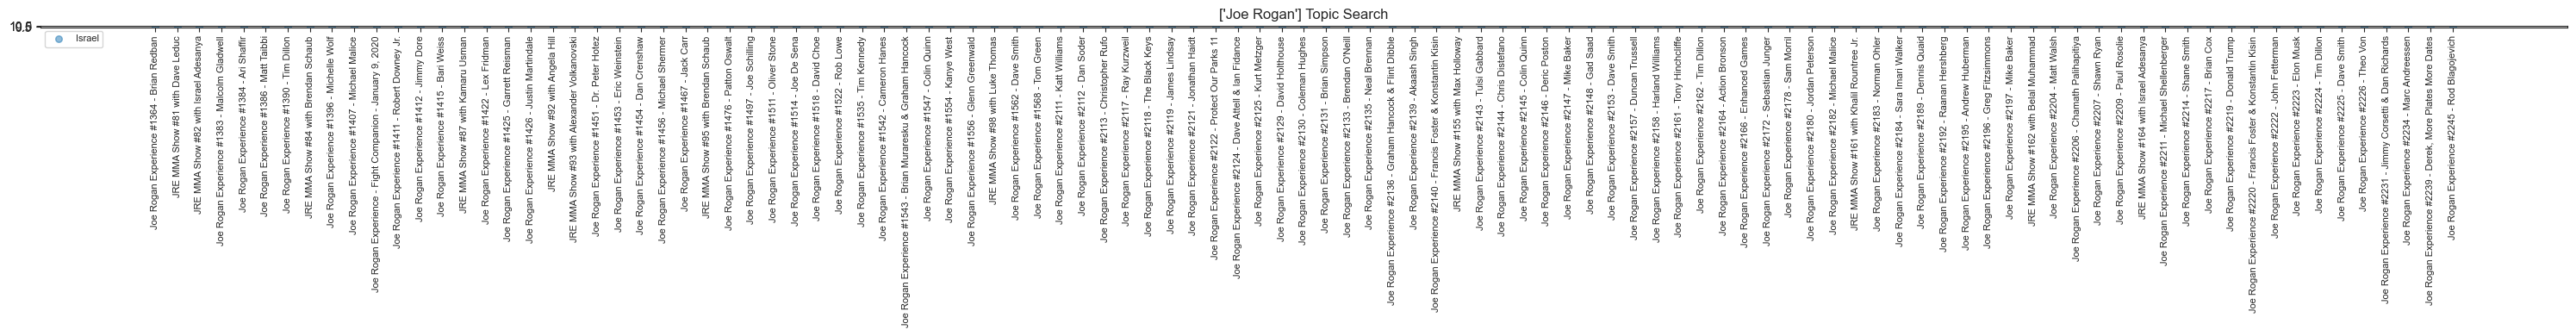

In [10]:
# make a scatter plot for each date whether the target words are in the transcript
sns.set_style("ticks")
plt.figure(figsize=(30, 4))
dates = topic_df['date']
# colormap for all dates
colors = sns.color_palette('tab10', n_colors=len(target_word_list))
titles = []
for date in tqdm.tqdm(sorted(dates), desc='Dates'):
		date_df = topic_df[topic_df['date'] == date]
		for idx, word in enumerate(target_word_list):
			if date_df[f'max_fuzzy_{word}'].max() > 0.9:
				plt.scatter(date, 10-idx, color=colors[idx], s=30, alpha=0.5, label=word)
				titles.append(date_df['title'].values[0])
plt.xticks(rotation=90, fontsize=8)
# make xticklabels the titles
plt.gca().set_xticklabels(titles)
plt.title(f'{author_names} Topic Search')
# only show the legend for each word once, not for each date
# get the handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=8)
plt.grid()
plt.tight_layout()
plt.show()

***
## Example 2: Bill Simmons - NBA Teams

In [11]:
author_names = ['Bill Simmons NFL']
transcript_df = main(author_names)

Searching for B transcripts...
Searching for i transcripts...
Searching for l transcripts...
Searching for l transcripts...
Searching for   transcripts...
Searching for S transcripts...
Searching for i transcripts...
Searching for m transcripts...
Searching for m transcripts...
Searching for o transcripts...
Searching for n transcripts...
Searching for s transcripts...
Searching for   transcripts...
Searching for N transcripts...
Searching for F transcripts...
Searching for L transcripts...
All Podcasts:
                                            a16z Bio: 28   transcripts
                                     Andrew Huberman: 223  transcripts
                                         BBC Archive: 1    transcripts
                                    Bill Simmons NBA: 212  transcripts
                                    Bill Simmons NFL: 97   transcripts
                                      Brain Inspired: 189  transcripts
               Chomskys Philosophy - Best of Chomsky: 150  trans

In [12]:
transcript_df

,title,date,year,month,day,weekday,url,transcript,date_generated,transcription_model,length,video_keywords,video_views,video_rating,video_description
0,"Top U.S. & World Headlines — September 12, 2024",2024-09-12,2024,09,12,Thursday,https://www.youtube.com/watch?v=cFC1BJ_n_j4,"[Welcome to Democracy Now!, democracynow.org, ...","September 12, 2024",whisper medium 20231117,571s,"['Democracy Now', 'Amy Goodman', 'News', 'Poli...",33356.0,None,NaN
1,How the Election Is Sinking a $15 Billion Busi...,2024-09-12,2024,09,12,Thursday,https://www.youtube.com/watch?v=eIX8o8Volxk,"[From the New York Times, I'm Sabrina Tavernis...","September 12, 2024",whisper medium 20231117,1223s,[],2224.0,None,"In a highly unusual move, the Biden administra..."
2,Is Deion Sanders Doomed at Colorado? With Van ...,2024-09-11,2024,09,11,Wednesday,https://www.youtube.com/watch?v=TBLq3sn4Zn4,"[All right. Since we have been on the pod, we ...","September 12, 2024",whisper medium 20231117,552s,"['Bill Simmons', 'Bill Simmons Podcast', 'The ...",33737.0,None,The Ringer’s Bill Simmons is joined by Van Lat...
3,Harris Baits Trump Inside Their Fiery Debate,2024-09-11,2024,09,11,Wednesday,https://www.youtube.com/watch?v=I7JDBK1t-xo,"[From New York Times, I'm Michael Boborjo., Th...","September 12, 2024",whisper medium 20231117,2225s,[],42654.0,None,In their first and possibly only presidential ...
4,"Harris Had a Theory of Trump, and It Was Right",2024-09-11,2024,09,11,Wednesday,https://www.youtube.com/watch?v=oRWJ0aY2n_Q,"[From New York Times opinion, this is the Ezra...","September 12, 2024",whisper medium 20231117,2795s,[],88232.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,Noam Chomsky - Innate Language,2014-10-06,2014,10,06,Monday,https://www.youtube.com/watch?v=XyaDTxGC-wI,[My own studies in language and human cognitio...,"May 24, 2024",whisper medium 20231117,227s,"['Linguistics', 'Language', 'Speech', 'Noam Ch...",21160.0,None,NaN
2833,Noam Chomsky on Liberalism,2014-09-30,2014,09,30,Tuesday,https://www.youtube.com/watch?v=yNSgNF4vFeU,[Let me begin by saying something about libera...,"May 24, 2024",whisper medium 20231117,230s,"['von Humboldt', 'Mill', 'Liberalism', 'Chomsk...",109416.0,None,NaN
2834,Noam Chomsky on Democracy,2014-09-28,2014,09,28,Sunday,https://www.youtube.com/watch?v=Oh_Zk6Da9fU,[The political system increasingly functions w...,"May 24, 2024",whisper medium 20231117,507s,"['Democracy', 'Noam Chomsky', 'Politics', 'Cho...",188809.0,None,NaN
2835,Noam Chomsky - Legal vs Illegal,2014-09-27,2014,09,27,Saturday,https://www.youtube.com/watch?v=9w_mTXrGe-E,[One does not necessarily allow the state to d...,"May 24, 2024",whisper medium 20231117,243s,"['Anarchism', 'State', 'Imperialism', 'Philoso...",117184.0,None,NaN


In [23]:
# perform fuzzy match for all words in target_word_list
target_word_list = ['lakers', 'clippers', 'warriors', 'suns', 'kings', 
                    'mavericks', 'rockets', 'grizzlies', 'pelicans', 'spurs', 
                    'timberwolves', 'thunder', 'nuggets', 'jazz', 'blazers',
								 		'heat', 'magic', 'wizards', 'hawks', 'hornets', 'nets', 
                    'celtics', 'knicks', '76ers', 'bucks', 'pacers', 
                    'pistons', 'bulls', 'cavaliers', 'raptors']
fuzzy_threshold = 0.85
transcript_df = topic_search(transcript_df, target_word_list, fuzzy_threshold)

Performing fuzzy search for the following words:
  ['lakers', 'clippers', 'warriors', 'suns', 'kings', 'mavericks', 'rockets', 'grizzlies', 'pelicans', 'spurs', 'timberwolves', 'thunder', 'nuggets', 'jazz', 'blazers', 'heat', 'magic', 'wizards', 'hawks', 'hornets', 'nets', 'celtics', 'knicks', '76ers', 'bucks', 'pacers', 'pistons', 'bulls', 'cavaliers', 'raptors']
Excluding the following words already in the dataset: 
  []
2024-06-05: NBA Finals Bets with Cousin Sal and Joe House | The Bill Simmons Podcast
  "lakers" Match Score: 0.7692 | Match: players
  "clippers" Match Score: 1.0    | Match: Clippers
  "warriors" Match Score: 1.0    | Match: Warriors
  "suns" Match Score: 0.8    | Match: sounds
  "kings" Match Score: 0.8889 | Match: king
  "mavericks" Match Score: 1.0    | Match: Mavericks
  "rockets" Match Score: 0.7143 | Match: tickets
  "grizzlies" Match Score: 0.5714 | Match: tries
  "pelicans" Match Score: 0.6667 | Match: Celtics
  "spurs" Match Score: 0.7273 | Match: sports
  

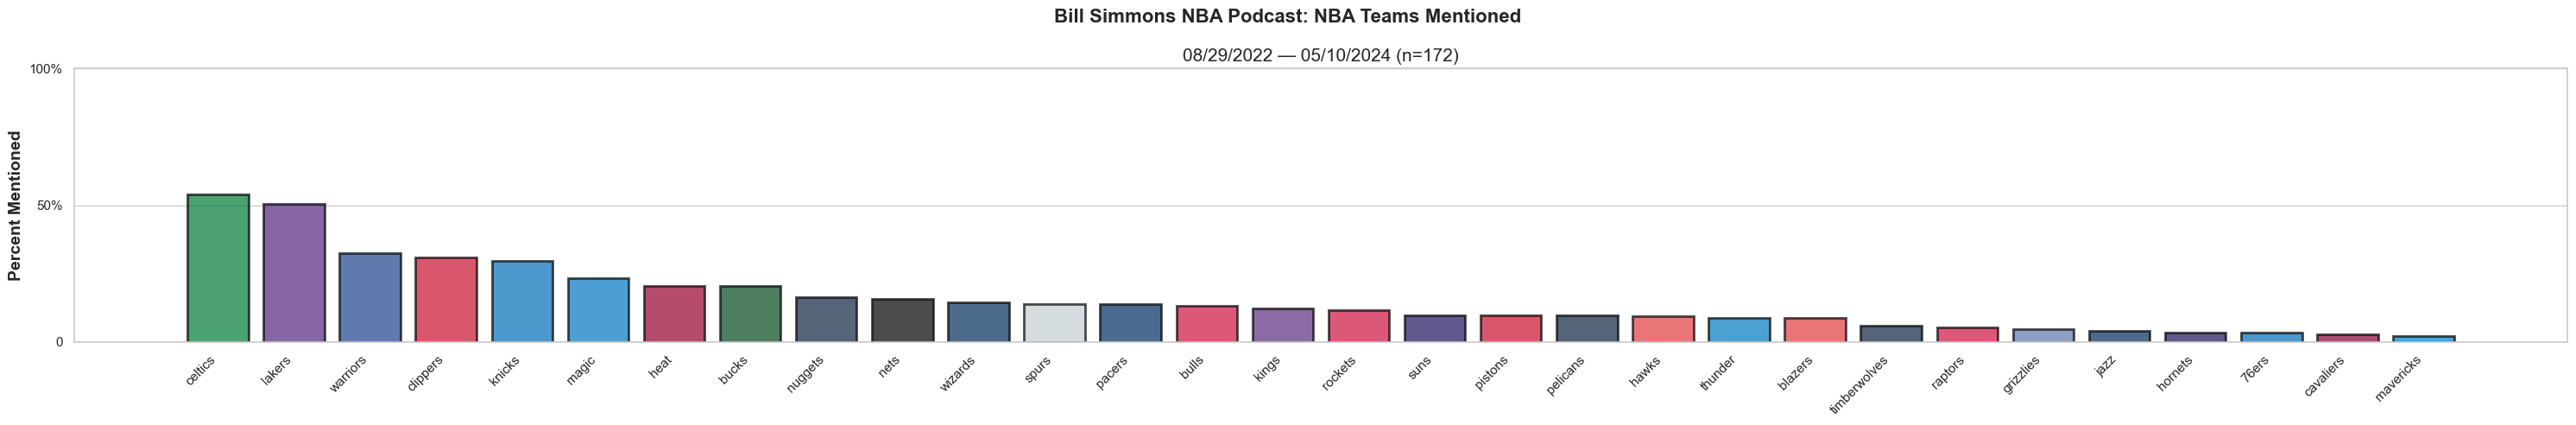

In [71]:
team_colors = {
    'lakers': '#552583',          # Purple and Gold
    'clippers': '#C8102E',        # Red and Blue
    'warriors': '#1D428A',        # Royal Blue and Gold
    'suns': '#1D1160',            # Purple, Orange, and Black
    'kings': '#5A2D81',           # Purple, Silver, and Black
    'mavericks': '#007DC5',       # Royal Blue, Navy Blue, and Silver
    'rockets': '#CE1141',         # Red and Silver
    'grizzlies': '#5D76A9',       # Navy Blue, Beige, and Slate Blue
    'pelicans': '#0C2340',        # Navy Blue, Gold, and Red
    'spurs': '#C4CED4',           # Silver, Black, and White
    'timberwolves': '#0C2340',    # Navy Blue, Lake Blue, and White
    'thunder': '#007AC1',         # Blue, Orange, and Yellow
    'nuggets': '#0E2240',         # Navy Blue, Gold, and Sky Blue
    'jazz': '#002B5C',            # Navy Blue, Gold, and Green
    'blazers': '#E03A3E',         # Red, Black, and White
    'heat': '#98002E',            # Red, Black, and White
    'magic': '#0077C0',           # Royal Blue, Silver, and Black
    'wizards': '#002B5C',         # Navy Blue, Red, and Silver
    'hawks': '#E03A3E',           # Red, Black, and Silver
    'hornets': '#1D1160',         # Purple, Teal, and White
    'nets': '#000000',            # Black and White
    'celtics': '#007A33',         # Green and White
    'knicks': '#006BB6',          # Royal Blue, Orange, and Silver
    '76ers': '#006BB6',           # Royal Blue, Red, and White
    'bucks': '#00471B',           # Hunter Green, Cream, and White
    'pacers': '#002D62',          # Navy Blue, Gold, and White
    'pistons': '#C8102E',         # Red, Blue, and White
    'bulls': '#CE1141',           # Red, Black, and White
    'cavaliers': '#860038',       # Wine, Gold, and Navy Blue
    'raptors': '#CE1141'          # Red, Black, and Silver
}

sns.set_theme(style="whitegrid")
plt.figure(figsize=(len(target_word_list), 5))

# add a column for the number of shows mentioned for each topic
for t_idx, topic in enumerate(target_word_list):
	# find the number of rows with max_fuzzy > 0.9 for the host
	topic_df = transcript_df[transcript_df[f'max_fuzzy_{topic}'] > 0.9]

# for each host find the number of rows with max_fuzzy > 0.9 and plot
num_mentions = []
for t_idx, topic in enumerate(target_word_list):
	# find the number of rows with max_fuzzy > 0.9 for the host
	topic_df = transcript_df[transcript_df[f'max_fuzzy_{topic}'] > 0.9]
	num_shows = topic_df.shape[0]/len(transcript_df)
	num_mentions.append(num_shows)

# sort the target_word_list by the number of shows mentioned
sorted_target_word_list = [x for _, x in sorted(zip(num_mentions, target_word_list), reverse=True)]
num_mentions = sorted(num_mentions, reverse=True)
# sort colors by the sorted target_word_list 
team_colors = {key: team_colors[key] for key in sorted_target_word_list}

plt.bar(range(len(target_word_list)), num_mentions, color=team_colors.values(), alpha=0.7, edgecolor='black', linewidth=2)
plt.ylim(0, 1)
plt.xticks(range(len(sorted_target_word_list)), sorted_target_word_list)
plt.yticks([0, 0.5, 1], ['0', '50%', '100%'])
# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percent Mentioned', fontsize=14, fontweight='bold')
plt.suptitle(f'{author_name} Podcast: NBA Teams Mentioned', fontsize=16, fontweight='bold')
# convert to mm/DD/YYYY
first_date = datetime.datetime.strptime(transcript_df['date'].iloc[-1], '%Y-%m-%d').strftime('%m/%d/%Y')
last_date = datetime.datetime.strptime(transcript_df['date'].iloc[0], '%Y-%m-%d').strftime('%m/%d/%Y')
plt.title(f'{first_date} — {last_date} (n={len(transcript_df)})', fontsize=15)
# reduce distance between sup and title
# only keep horizontal grid
plt.grid(axis='x')
# tight layout
plt.tight_layout()